## Goals:

1. introduce machine learning
2. introduce the scikit-learn application programming interface (API)

## Schedule:

3:00 - 3:15 Machine Learning and the Scikit-learn API

    What is Machine Learning?
    What is scikit-learn and why should I use it?
    Representation of data in machine learning and sk-learn
    The scikit-learn API
    
3:15 - 3:45 Supervised learning

    Support Vector Machines
    
3:45 - 4:15 Validation and Model Selection

    Overfitting, Underfitting, bias, and variance
    Improving your fit: validation curves and learning curves

## What is machine learning?
    * everday examples:
        - email spam filter
        - Netflix or Spotify recommendations
    * "gives computers ability to learn without being programmed"
        --Arthur Samuel, inventor of the term "machine learning" and pioneering researcher
    * automates tasks for which it would be tedious or just imposible to write imperative code
        - examples above ~ tedious
        - games, such as chess ~ mostly impossible

## Really it’s just **modeling**

* ML algorithms generate a **model** $y = f(x)$
    - you **train** them with data you’ve seen
    - so you can **predict** based on new data points
* e.g., regression
You can do this with 100s of observations per continuous label instead of just one
Talk about classification
Plot dots, draw a separating line
ML can do this in 1Ks of dimensions

## Linear regression: the least fanciest machine learning
Scientists tend to think of linear regression as a way to demonstrate cause and effect.

a linear regression also functions as a model.

If we pick a point on the X axis for which we do not have data, and then take the predicted Y value for that point

In [19]:
# generate some fake data
from sklearn.datasets.samples_generator import make_regression
X, Y = make_regression(random_state=42)

In [22]:
# tell notebook to show plots inline instead of opening in a separate window
%matplotlib inline
import matplotlib.pyplot as plt

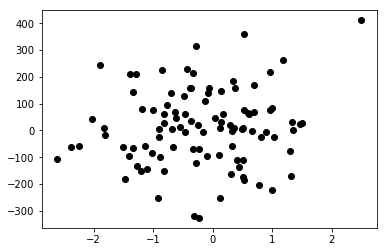

In [21]:
plt.plot(X[3,:], Y, 'ko')

## Types of machine learning
    
    1. Supervised Learning
        Classification
        Regression
    2. Unsupervised Learning
        Clustering
        Dimensionality Reduction
    3. Reinforcement Learning

## What is scikit-learn and why should I use it?

[Scikit-Learn](http://scikit-learn.org/stable/index.html):
    * Python package
    * provides access to well-known machine learning algorithms via Python code
    * through a clean, well-thought-out API
    * built upon Python's NumPy (Numerical Python) and SciPy (Scientific Python) libraries
    * not specifically designed for extremely large datasets

## Representation of data in machine learning and scikit-learn

In form of 2-d matrix

Number of rows = number of samples, i.e., discrete items you’re interested in looking at, such as images if you’re classifying images

Number of columns = number of features, each observation/measurement you have for each sample

Example: iris dataset

You want your data to be 2-d array

You want your labels to be 1-d array

You should always visualize your data!!!


## the scikit-learn API

Sklearn estimator object
Python is object-oriented: each model/algorithm is a class
You import model
E.g. LinearRegression
`print model`
A type of model is a class, and the model itself is an instantiation of a class
We have some hyperparameters
We fit the model
Underscore at the end of an attribute -> parameter value from fit
